In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [5]:
sample

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [6]:
train.shape,test.shape

((6368, 15), (3430, 14))

In [7]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [8]:
train = train.dropna(axis=0, subset=['Selling_Price'])
train = train.reset_index(drop = True)

In [9]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [10]:
data = pd.concat([train,test])

In [11]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [12]:
data = data.reset_index(drop = True)

In [13]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_id,9757,9757,RNGEDAPFZE2K4KSD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stall_no,9751.0,NaN,NaN,NaN,25.425187,14.352011,1.0,13.0,25.0,38.0,50.0
instock_date,9757,7664,2015-05-05 14:09:22.000,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market_Category,9757.0,NaN,NaN,NaN,198.254279,169.785262,0.0,55.0,128.0,389.0,471.0
Customer_name,9497,8927,Kit,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty_customer,9757,2,Yes,5949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,9757,10,Pet_care,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade,9757.0,NaN,NaN,NaN,0.652352,1.032715,0.0,0.0,0.0,2.0,3.0
Demand,9757.0,NaN,NaN,NaN,50.569232,28.917136,1.0,26.0,50.0,76.0,100.0
Discount_avail,9720.0,NaN,NaN,NaN,0.142284,0.349359,0.0,0.0,0.0,0.0,1.0


In [14]:
data.shape

(9757, 15)

In [15]:
data.duplicated().sum()

0

In [16]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        260
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
dtype: int64

In [17]:
data.isna().sum()/data.shape[0]

Product_id          0.000000
Stall_no            0.000615
instock_date        0.000000
Market_Category     0.000000
Customer_name       0.026648
Loyalty_customer    0.000000
Product_Category    0.000000
Grade               0.000000
Demand              0.000000
Discount_avail      0.003792
charges_1           0.023983
charges_2 (%)       0.021421
Minimum_price       0.005330
Maximum_price       0.034949
Selling_Price       0.351542
dtype: float64

In [18]:
data['Product_id'].value_counts()

RNGEDAPFZE2K4KSD    1
SHOEE9HFJWS5BG8P    1
TOPE7W4CTCPJXDDC    1
LJGEJQ4ZHGA5XSD7    1
INKECA5VFTCGF77E    1
                   ..
CAGE46YZDCJFGGHV    1
CRTECN2QV7YZBUY5    1
RTRE8EHVG8MKE29S    1
BRFEHWGA3B6YEWNG    1
DREEGGYS8EW6FW7P    1
Name: Product_id, Length: 9757, dtype: int64

In [19]:
data['Stall_no'].value_counts()

20.0    226
32.0    222
12.0    220
25.0    217
28.0    214
9.0     213
14.0    212
33.0    210
2.0     207
31.0    206
48.0    206
37.0    204
39.0    204
5.0     202
44.0    202
46.0    201
11.0    200
34.0    200
23.0    200
3.0     198
19.0    198
27.0    196
40.0    196
17.0    196
1.0     196
30.0    193
36.0    191
10.0    190
41.0    189
16.0    189
18.0    188
6.0     188
26.0    188
43.0    187
38.0    187
24.0    186
7.0     186
35.0    186
29.0    185
49.0    185
22.0    182
47.0    181
4.0     181
50.0    180
21.0    180
42.0    179
45.0    179
15.0    179
8.0     178
13.0    168
Name: Stall_no, dtype: int64

In [20]:
data['Stall_no'].isna().sum()

6

In [21]:
data['Stall_no']=data['Stall_no'].fillna(data['Stall_no'].mode()[0])

In [22]:
data['Stall_no'].value_counts()

20.0    232
32.0    222
12.0    220
25.0    217
28.0    214
9.0     213
14.0    212
33.0    210
2.0     207
31.0    206
48.0    206
37.0    204
39.0    204
5.0     202
44.0    202
46.0    201
11.0    200
34.0    200
23.0    200
3.0     198
19.0    198
27.0    196
40.0    196
17.0    196
1.0     196
30.0    193
36.0    191
10.0    190
41.0    189
16.0    189
18.0    188
6.0     188
26.0    188
43.0    187
38.0    187
24.0    186
7.0     186
35.0    186
29.0    185
49.0    185
22.0    182
47.0    181
4.0     181
50.0    180
21.0    180
42.0    179
45.0    179
15.0    179
8.0     178
13.0    168
Name: Stall_no, dtype: int64

In [23]:
data['Stall_no'].isna().sum()

0

In [24]:
data['Stall_no'] = data['Stall_no'].astype('int64')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9757 non-null   object 
 1   Stall_no          9757 non-null   int64  
 2   instock_date      9757 non-null   object 
 3   Market_Category   9757 non-null   int64  
 4   Customer_name     9497 non-null   object 
 5   Loyalty_customer  9757 non-null   object 
 6   Product_Category  9757 non-null   object 
 7   Grade             9757 non-null   int64  
 8   Demand            9757 non-null   int64  
 9   Discount_avail    9720 non-null   float64
 10  charges_1         9523 non-null   float64
 11  charges_2 (%)     9548 non-null   float64
 12  Minimum_price     9705 non-null   float64
 13  Maximum_price     9416 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.1+ MB


In [26]:
data.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.004205,-0.008564,0.000270,-0.009478,-0.010759,-0.004324,-0.003942,-0.004383,0.011674
Market_Category,-0.004205,1.000000,-0.034151,-0.015518,-0.000215,0.020660,0.016457,0.199884,0.145650,0.138711
Grade,-0.008564,-0.034151,1.000000,0.003397,-0.027969,-0.017184,-0.014640,-0.077175,0.169504,0.086450
Demand,0.000270,-0.015518,0.003397,1.000000,-0.004337,-0.003608,0.013847,-0.008415,-0.012208,-0.000601
Discount_avail,-0.009478,-0.000215,-0.027969,-0.004337,1.000000,-0.002041,0.018585,0.013961,0.002116,-0.512457
charges_1,-0.010759,0.020660,-0.017184,-0.003608,-0.002041,1.000000,0.276583,0.021734,0.019301,0.053045
charges_2 (%),-0.004324,0.016457,-0.014640,0.013847,0.018585,0.276583,1.000000,0.012084,0.009368,0.009031
Minimum_price,-0.003942,0.199884,-0.077175,-0.008415,0.013961,0.021734,0.012084,1.000000,0.719903,0.700444
Maximum_price,-0.004383,0.145650,0.169504,-0.012208,0.002116,0.019301,0.009368,0.719903,1.000000,0.766928
Selling_Price,0.011674,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


In [27]:
data['instock_date'].value_counts()

2015-05-05 14:09:22.000    7
2016-03-29 21:55:43.000    7
2015-05-06 17:20:59.000    7
2015-09-22 14:30:05.000    7
2015-09-25 13:22:53.000    7
                          ..
2015-09-26 16:29:15.000    1
2015-11-20 05:37:20.000    1
2016-03-05 06:54:55.000    1
2016-02-29 02:03:00.000    1
2015-09-22 13:21:16.000    1
Name: instock_date, Length: 7664, dtype: int64

In [28]:
data['Market_Category'].value_counts()

23     493
452    475
358    430
55     397
58     373
      ... 
219      1
200      1
187      1
155      1
203      1
Name: Market_Category, Length: 275, dtype: int64

In [29]:
data['Customer_name'].value_counts()

Kit        2
Skyler     2
Jace       2
Kobi       2
Hayes      2
          ..
Aerilyn    1
Johan      1
Keilani    1
Jasir      1
Winslow    1
Name: Customer_name, Length: 8927, dtype: int64

In [30]:
data['Customer_name'] = data['Customer_name'].fillna(data['Customer_name'].mode()[0])

In [31]:
data['Customer_name'].isna().sum()

0

In [32]:
data['Loyalty_customer'].value_counts()

Yes    5949
No     3808
Name: Loyalty_customer, dtype: int64

In [33]:
data['Product_Category'].value_counts()

Pet_care       1025
Repair         1011
Child_care     1003
Cosmetics       992
Educational     960
Technology      957
Hospitality     955
Organic         954
Home_decor      951
Fashion         949
Name: Product_Category, dtype: int64

In [34]:
data.isna().sum()

Product_id             0
Stall_no               0
instock_date           0
Market_Category        0
Customer_name          0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
dtype: int64

In [35]:
data['Grade'].value_counts()

0    6686
2    1690
3     802
1     579
Name: Grade, dtype: int64

In [36]:
data['Demand'].value_counts()

86    115
72    114
64    113
93    112
27    111
     ... 
11     84
51     82
60     82
43     80
75     70
Name: Demand, Length: 100, dtype: int64

In [37]:
data['Discount_avail'].value_counts()

0.0    8337
1.0    1383
Name: Discount_avail, dtype: int64

In [38]:
data['Discount_avail'].isna().sum()

37

In [39]:
data['Discount_avail'] = data['Discount_avail'].fillna(data['Discount_avail'].mode()[0])

In [40]:
data['Discount_avail'].isna().sum()

0

In [41]:
data['Discount_avail'].value_counts()

0.0    8374
1.0    1383
Name: Discount_avail, dtype: int64

In [42]:
data['charges_1'].value_counts()

101.0    63
147.0    60
266.0    58
129.0    58
284.0    57
         ..
569.0     1
542.0     1
490.0     1
574.0     1
469.0     1
Name: charges_1, Length: 494, dtype: int64

In [43]:
data['charges_1']=data['charges_1'].fillna(data['charges_1'].mean())

In [44]:
data = data.rename(columns = {"charges_2 (%)":"charges in percentage"})

In [45]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges in percentage,Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,BBAE9K7BXFUTDNBK,9,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,RTRDYPA4PJHCJCGF,30,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,TUNE8FWQBS7TVVT7,14,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,NKCEGMUABCRGUZPE,1,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [46]:
data['charges in percentage']=data['charges in percentage'].fillna(data['charges in percentage'].mean())

In [47]:
data['Minimum_price'].value_counts()

962.0     8
3311.0    8
2097.0    8
2779.0    8
1891.0    7
         ..
1268.0    1
1197.0    1
8759.0    1
3953.0    1
5074.0    1
Name: Minimum_price, Length: 5366, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minimum_price'>

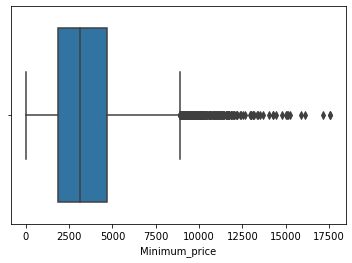

In [48]:
sns.boxplot(data['Minimum_price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Maximum_price'>

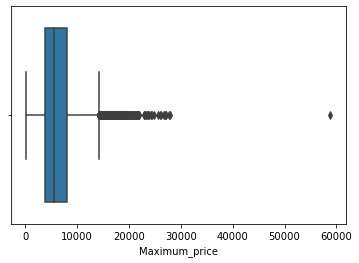

In [49]:
sns.boxplot(data['Maximum_price'])

In [50]:
data['Minimum_price']=data['Minimum_price'].fillna(data['Minimum_price'].median())

In [51]:
data['Maximum_price']=data['Maximum_price'].fillna(data['Maximum_price'].median())

In [52]:
data.isna().sum()

Product_id                  0
Stall_no                    0
instock_date                0
Market_Category             0
Customer_name               0
Loyalty_customer            0
Product_Category            0
Grade                       0
Demand                      0
Discount_avail              0
charges_1                   0
charges in percentage       0
Minimum_price               0
Maximum_price               0
Selling_Price            3430
dtype: int64

In [53]:
num_col = data.select_dtypes(include=np.number)

In [54]:
num_col

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges in percentage,Minimum_price,Maximum_price,Selling_Price
0,37,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
9752,9,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,30,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,14,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,1,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [55]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Product_id','instock_date',"Customer_name"])

In [56]:
cat_col

,Loyalty_customer,Product_Category
0,Yes,Fashion
1,Yes,Fashion
2,Yes,Child_care
3,Yes,Educational
4,Yes,Repair
...,...,...
9752,Yes,Pet_care
9753,Yes,Technology
9754,Yes,Educational
9755,Yes,Child_care


In [57]:
cat_col_processed = pd.get_dummies(cat_col)

In [58]:
cat_col_processed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,0,0
9753,0,1,0,0,0,0,0,0,0,0,0,1
9754,0,1,0,0,1,0,0,0,0,0,0,0
9755,0,1,1,0,0,0,0,0,0,0,0,0


In [59]:
scale = StandardScaler()
num_col_scaled = pd.DataFrame(scale.fit_transform(num_col.drop(columns=["Grade","Discount_avail","Selling_Price"])),columns=num_col.drop(columns=["Grade","Discount_avail","Selling_Price"]).columns)

In [60]:
num_col_scaled

,Stall_no,Market_Category,Demand,charges_1,charges in percentage,Minimum_price,Maximum_price
0,0.806981,-1.155956,0.602814,0.900658,0.175721,-0.236982,-0.449692
1,0.876679,-1.026374,0.014897,1.070979,0.411432,1.830033,1.114280
2,-1.144580,1.465136,-1.403020,-0.121271,-0.295700,1.031538,0.270306
3,1.713062,-1.032264,-0.088853,-0.980988,0.647143,0.728266,4.015907
4,-1.283977,-0.796660,-0.538436,-0.437582,-1.474253,-0.490320,0.811692
...,...,...,...,...,...,...,...
9752,-1.144580,-0.826111,-0.400103,-1.199973,-1.238542,-0.186131,-0.460509
9753,0.319091,0.940917,-1.160936,1.979360,-1.002832,-0.053278,2.155171
9754,-0.796087,-0.543386,-0.503853,-0.932325,1.589985,-1.278278,1.264603
9755,-1.702169,-0.555167,0.429898,0.487020,1.118564,-0.926903,-0.324331


In [61]:
data_prerocessed = pd.concat([cat_col_processed,num_col_scaled, num_col[["Grade","Discount_avail","Selling_Price"]],data["Product_id"]],axis = 1)

In [62]:
train_preprocessed = data_prerocessed[data_prerocessed['Selling_Price'].notna()]

In [63]:
test_preprocessed = data_prerocessed[data_prerocessed['Selling_Price'].isna()]

In [64]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)